In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [4]:
tf.test.is_built_with_cuda()

True

In [5]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

170508288/170498071 [==============================] - 3s 0us/step


In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [8]:
def plot_sample(index):
    plt.figure(figsize = (10,1))
    plt.imshow(X_train[index])

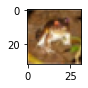

In [10]:
plot_sample(0)

In [11]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [12]:
y_train[3]

array([4], dtype=uint8)

In [13]:
classes[y_train[3][0]]

'deer'

In [14]:
X_train_scaled = X_train/255
X_test_scaled = X_test/255

Converting labels into One Hot Vector (Categorical)

In [15]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [16]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = 'float32'
)

y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype = 'float32'
)

y_test_categorical[:5]

array([[0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

In [19]:
model = keras.Sequential([
                          keras.layers.Flatten(input_shape = (32, 32, 3)),
                          keras.layers.Dense(3000, activation = 'relu'),
                          keras.layers.Dense(1000, activation = 'relu'),
                          keras.layers.Dense(10, activation = 'sigmoid'),
])

model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs = 50)

Epoch 1/50
1563/1563 [==============================] - 6s 3ms/step - loss: 1.8076 - accuracy: 0.3554
Epoch 2/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6212 - accuracy: 0.4269
Epoch 3/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5368 - accuracy: 0.4579
Epoch 4/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4774 - accuracy: 0.4786
Epoch 5/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4289 - accuracy: 0.4966
Epoch 6/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3836 - accuracy: 0.5127
Epoch 7/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3474 - accuracy: 0.5271
Epoch 8/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.3105 - accuracy: 0.5395
Epoch 9/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.2801 - accuracy: 0.5490
Epoch 10/50
1563/1563 [==============================] - 5s 3ms/step - loss: 1.247

In [20]:
np.argmax(model.predict(X_test_scaled)[1])

8

In [21]:
model.evaluate(X_test_scaled, y_test_categorical)

313/313 [==============================] - 1s 3ms/step - loss: 1.6563 - accuracy: 0.5577


[1.6563210487365723, 0.557699978351593]

In [22]:
classes[y_test[1][0]]

'ship'

In [23]:
def get_model():
    model = keras.Sequential([
                            keras.layers.Flatten(input_shape = (32, 32, 3)),
                            keras.layers.Dense(3000, activation = 'relu'),
                            keras.layers.Dense(1000, activation = 'relu'),
                            keras.layers.Dense(10, activation = 'sigmoid'),
    ])

    model.compile(optimizer = 'SGD', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [24]:
%%timeit -n1 -r1
with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 85s 54ms/step - loss: 1.8124 - accuracy: 0.3535
1 loop, best of 1: 1min 25s per loop


In [25]:
%%timeit -n1 -r1
with tf.device('/GPU:0'):
    gpu_model = get_model()
    gpu_model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 5s 3ms/step - loss: 1.8137 - accuracy: 0.3524
1 loop, best of 1: 5.96 s per loop
